# Statistics and Data Journalism
## HODP Bootcamp Week 5
### October 15, 2019

In [212]:
# Run this cell to make sure you have the requirements 
# It should return 0. Then, comment it out. 

import os 
os.system("pip3 install -r requirements.txt")

0

### Goals for this week:
* Significance tests
  - Two sample t-tests
  - One sample t-tests
  - Permutation tests
* Confidence intervals
* Understand the difference between correlation and causation
* Practice basic linear regression

### Load in the data
Here is a dataset of US House election data in 2018. I've taken the liberty of cleaning the data for you using R. The original dataset is from MIT election labs and is also included as is my cleaning code. 

In [193]:
import pandas as pd
import numpy as np

house = pd.read_csv("house_elections_2018_clean.csv")
house.head()

,Unnamed: 0,year,state,electiondistrict,runoff,special,candidate,party,writein,candidatevotes,totalvotes,prop
0,28278,2018,Alabama,AL1,NaN,False,Robert Kennedy Jr.,democrat,False,89226,242617,0.367765
1,28279,2018,Alabama,AL1,NaN,False,Bradley Byrne,republican,False,153228,242617,0.631563
2,28281,2018,Alabama,AL2,NaN,False,Martha Roby,republican,False,138879,226230,0.613884
3,28282,2018,Alabama,AL2,NaN,False,Tabitha Isner,democrat,False,86931,226230,0.384259
4,28284,2018,Alabama,AL3,NaN,False,Mike Rogers,republican,False,147770,231915,0.637173


## Hypothesis Tests and P-Values
### Did Rebublicans and Democrats win significantly different proportions of the vote in 2018 House elections? 
#### But first, a quick note on Parameters vs. Statistics
* In data journalism, we're often interested in estimating *pararameters* of interest, which are fixed but often unknown quantities.
* We estimate these with *sample statistics*, which are known instantiates of random estimators that vary as a function of our data. 
* Mixing up the two is a common pitfall in journalism.

#### Two sample t-tests
We're going to conduct a two sample t-test. We can do this with SciPy's built in t-test function. A two sample t-test is a test of how "far" two sample statistics are from each other; we're usually trying to see if they are significantly different from each other. Let's use Python to see if the proportions of votes for Dems and Repubs are significantly different.

This testing paradigm assumes that our observations are normally distributed. Let's also plot a histogram of our observations to make sure this assumption is satisfied using matplotlib. 

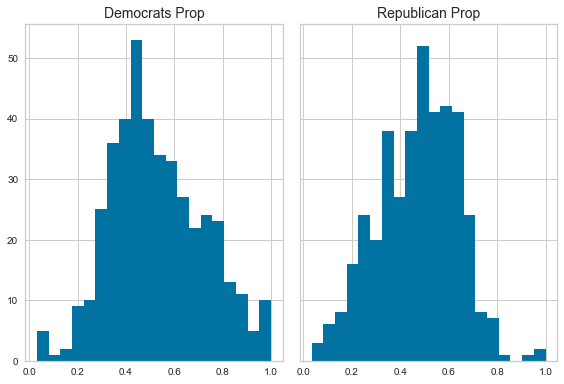

In [194]:
import matplotlib
import matplotlib.pyplot as plt

democrats = house[house.party == 'democrat']
republicans = house[house.party == 'republican']
n_bins = 20
fig, ax = plt.subplots(1, 2, sharey=True, tight_layout=True)
ax[0].hist(democrats.prop, bins=n_bins)
ax[0].set_title("Democrats Prop", fontsize=14)
ax[1].hist(republicans.prop, bins=n_bins)
ax[1].set_title("Republican Prop", fontsize=14)

plt.show()

Now that we've checked our assumption of normality, we can perform our t-test.

In [209]:
from scipy import stats
print("Democratic minus Republican proportion:", np.mean(democrats.prop) - np.mean(republicans.prop))
stats.ttest_ind(democrats.prop, republicans.prop, equal_var = False)

Democratic minus Republican proportion: 0.05622616584148804


Ttest_indResult(statistic=4.474054464422503, pvalue=8.770242865379696e-06)

### Interpreting the Results
Now, we have a p-value. The p-value is often misunderstood or improperly interpreted, so it's very important to know what it actually means. **A p-value is the probability of observing our data, given that the null hypothesis is correct.** So, we assume that our data are random, but the true values are fixed. A common pitfall when interpreting p-values is to think of the p-value as the probability of the null hypothesis being correct, but this interpretation is wrong. Looking at the results above with this in mind, we can see that if Democrats and Republicans truly had the same average ranking, there would be very low probability of getting the data we got (though still possible), so we can pretty reasonably reject the null hypothesis and say that the two parties do not have equal proportions. Because the test statistic is negative, we can see that Adams has a lower (better) ranking. 

In general, a common rule of thumb is to reject the null hypothesis when the p-value is less than 0.05. When we fail to reject the null hypothesis, we should never say that we "accept" or "prove" the null. All we have done is failed to reject it; we can never prove the null hypothesis true.

In this case, with a pvalue < 0.001, we can reject the null hypothesis. We have significant evidence that Republicans and Democrats had different vote proportions on average in 2018 house elections and that, on average, Democrats had higher proportions than Republicans. 

### One-sample tests

We can also do one-sample tests, where we compare our statistic to a set value. A one sample t-test is a test of how "far" a sample statistic is from a hypothesized "true" value, still assuming normality of observations. For example, if Dean Khurana tells you that he believes 75% of students support the social group sanctions, but your HODP survey suggests that only 65% of students support the sanctions, you can test whether that difference is sufficiently large to dispute Khurana's claim.

To run such a test, you can use the stats.ttest_1samp() command (documentation here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html)

**Let's say Fox News claims that the true proportion of American that voted for Republicans in 2018 was 49%. Perform a one sample t-test to validate this claim. Comment on your assumptions for a one sample t-test.**

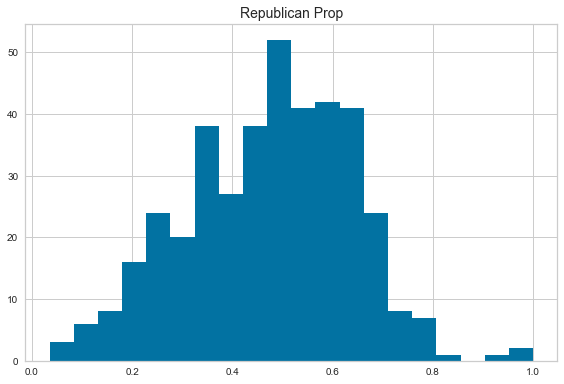

Ttest_1sampResult(statistic=-1.879688695739978, pvalue=0.060880814638531705)

In [196]:
fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)
ax.hist(republicans.prop, bins=n_bins)
ax.set_title("Republican Prop", fontsize=14)
plt.show()

stats.ttest_1samp(republicans.prop, 0.49)

Equally important in data journalism: add an interpretation of your data analysis here! 

Solution: Since our data appear to be approximately normally distributed, we have met the criteria to perform a t-test. With a pvalue of 0.06, we do not have evidence that the Republican proportion was different from 49%. 

### Permutation Tests
If our normality assumptions fail for our observations, then we shouldn't use t-tests. In that case, we would be better off performing a nonparametric test like a permutation test. A permutation works by assuming that the labels of democrat and republican make no difference in determining proportions. Therefore, shuffling up the labels should not affect averages between the two groups. 

The test works by shuffling labels and computing differences in means many times. This produces a distribution of test statistics. Then, we calculate a p-value by finding the probability of observing a test statistic as extreme or more extreme than the one produced by our particular permutation of labels and proportions. 

Code to do this is given below. 

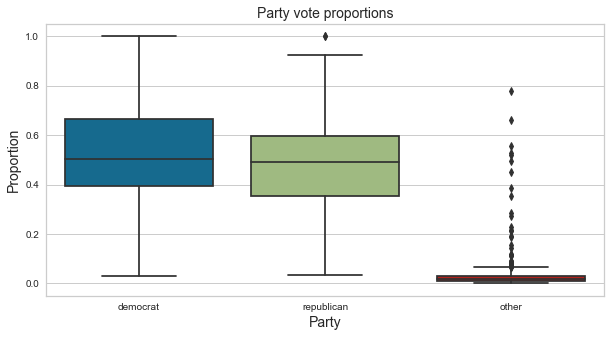

0.0

In [210]:
from mlxtend.evaluate import permutation_test
import seaborn as sns

f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.boxplot(x='party', y='prop', data=house)
ax.set_xlabel("Party", fontsize=14)
ax.set_ylabel("Proportion", fontsize=14)
ax.set_title("Party vote proportions", fontsize=14)
plt.show()

p_value = permutation_test(democrats.prop, republicans.prop,
                           method='approximate',
                           num_rounds=10000,
                           seed=0)

p_value


This test does not assume normality, but it does assume that the two groups are drawn from the same distribution. This assumption needs to be checked as well. We will check it by using boxplots. The trade off is that while permutation tests are great for calculating p-values, unlike t-tests they aren't great for confidence intervals. When you conduct a t-test, you basically get a confidence interval for free since you know the distribution of your test statistic. 

BUT SETH! What's a confidence interval? 

## Confidence Intervals
A confidence interval is a range of plausible values for your parameter. You're probably quite familiar with point estimates in Statistics, where we say the observed proportion of democratic votes is, say, 0.53. Your estimator here is a random variable, a function of your data, that estimates a parameter - the true proportion of democratic votes. A confidence interval is, as the name suggests, an interval that we think the true value is likely to fall in. These intervals have a certain level of *confidence*, or the percentage of intervals calculated using this method that contain the true value. There is a trade off between confidence and width - higher confidence is great, but it will also widen the interval, which can make it less useful. For example, you can construct a 100% confidence interval for anything, but it goes from negative infinity to positive infinity, and tells us nothing about the parameter of interest.

In practice, 95% confidence intervals are quite popular, which means that, on average, 19 out of every 20 contain the true value of the parameter of interest. A common pitfall with confidence intervals is to say there is a 95% chance that the true value falls inside the interval, but this interpretation is incorrect, so please stay away from this phrase in your articles.

Now, let's construct a 95% confidence interval for the proportion of democratic votes. We have to do a bit more work to generate a confidence interval in Python. We need to provide SciPy's interval function with a confidence level, a center (the sample mean), and a scale (the standard error, which is the sample standard deviation divided by the square root of one less than the length of the dataset).

In [211]:
mean, sigma = np.mean(democrats.prop), np.std(democrats.prop)

conf_int = stats.norm.interval(0.95, 
                               loc = mean, 
                               scale = sigma/np.sqrt(len(democrats.prop) - 1))
conf_int

(0.5121324337735289, 0.5491756352238242)

Now, try generating an interval for the republican data using a different confidence level, and interpret your results.

In [199]:
#generate the interval here

Interpret your results here!

## Causation vs. Correlation
You've all probably heard this before, but it's important to hear it again: correlation does not imply causation. It's pretty rare that we'll be able to show causation in a HODP article, so it's important to frame most of our work as a correlation or trend we noticed, rather than as a direct cause. Often, though, it will intuitively make sense that there "should" or at least "could" be a causal connection. In those cases, make sure to frame your writing as a "possible explanation" than as a statement of what is going on. For example, the percentage of female concentrators by department is likely strongly correlated with the percentage of female faculty members, and there is probably some causal effect here. However, it's best to cite other research on whether such a trend has a causal effect, or to cite relevant quantitative work. For example, in an article about gender balance in different departments, we could talk about existing research on the effect of faculty gender on students and potentially cite relevant Crimson articles, but we should not conclude that (for example) low female faculty presence in Mathematics *causes* low female student presence in Mathematics.

For people who are particularly interested in causation, talk to Seth or look at Stat 111 (Statistical Inference), Stat 186 (Causal Inference), and Ec 1123 (Econometrics).

Let's look at some examples of how we might be able to find correlations that are likely not causal. This will also show you how to find a correlation coefficient. If all you want is the correlation, it's very easy.

In [200]:
from scipy.stats.stats import pearsonr

rankings = pd.read_csv("house_rankings_2018.csv")
houses = rankings.House
rankings.set_index("House", inplace = True)
rankings
#monthly high temps in Boston
bostontemps = [37, 39, 46, 57, 67, 77, 82, 81, 73, 62, 52, 42]
levCounts = list(rankings.values[5,])
pearsonr(levCounts, bostontemps)

(0.7635806435842531, 0.0038495884100404063)

So though Boston temperature and Leverett ratings are correlated, it's ridiculous to say one causes the other. Correlation, independence, and causation are just all totally different things, so we need to be careful not to mix them up. 


## Basic Regression
Regression is a very useful tool for prediction. Linear regressions allow us to easily model a linear relationship between a response/dependent/Y variable and 1 or more predictor/independent/X variables. This is a very widely used technique, so if you plan to use regression in your project, please come talk to us for a more in depth treatment of the subject, but here are the basics! Regressions in Python are fairly easy to do: we just need a Y list, and at least one X list of equal length! Below, we've built a regression to predict first place rankings from distance away from Widener Library. Note that you may sometimes need to reshape data a bit.

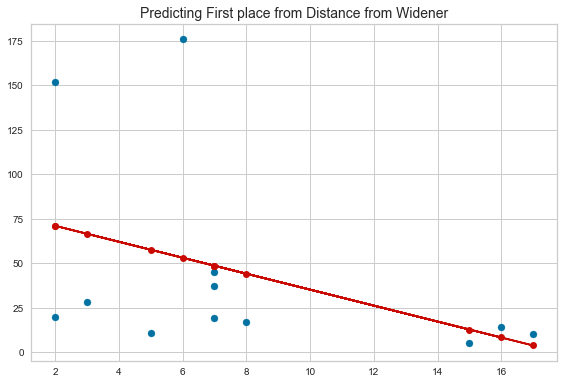

80.0057018734727 [-4.48493076]
[-0.41418385]
(-0.414183846812948, 0.18070743478976722)


In [201]:
from sklearn import linear_model
import statsmodels.api as sm

lm = linear_model.LinearRegression()
#walking time from Widener Library (in minutes), from Google Maps
dist = [2, 15, 7, 8, 3, 5, 7, 16, 7, 2, 17, 6]

# Reshape distances as a column vector
dist_reshaped = np.array(dist).reshape(-1,1)
first_place = [rankings.values[i,0] for i in range(0, 12)]

#X, Y is the order
reg = lm.fit(dist_reshaped, first_place)
beta0, beta1 = reg.intercept_, reg.coef_
y_predict = np.multiply(dist_reshaped,beta1) + beta0

fig, ax = plt.subplots(1, 1, sharey=True, tight_layout=True)
ax.scatter(dist_reshaped, first_place)
plt.plot(dist_reshaped, y_predict, '-o',color='r')
ax.set_title("Predicting First place from Distance from Widener", fontsize=14)
plt.show()
print(beta0, beta1)

# Demystifying Beta1
covariance = beta1 * np.var(dist) 
cor = covariance / (np.std(dist) * np.std(first_place))
print(cor)
print(pearsonr(first_place, dist))

You can also do this a slightly different way using an OLS object to get more information. You just have to further reformat your data. 

In [202]:
dist_reshaped_ols = sm.add_constant(dist_reshaped)
mod = sm.OLS(first_place,dist_reshaped_ols)
results = mod.fit()
results.summary()

/Users/sethbilliau/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  of the normal distribution: ``kurtosis = 3(n-1)/(n+1)``.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.071
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.181
Time:                        23:11:58   Log-Likelihood:                -63.934
No. Observations:                  12   AIC:                             131.9
Df Residuals:                      10   BIC:                             132.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         80.0057     29.279      2.733      0.021      14.768     145.243
x1            -4.4849      3.117     -1.439      0.181     -11.429       2.460
==============================================================================
Omnibus:                        8.123   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                4.173
Skew:                           1.378   Prob(JB):                        0.124
Kurtosis:                       3.864   Cond. No.                         17.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interpreting your Coefficients
In simple regression, we can interpret the coefficients easily. In this case, the coefficient 1.468 is the change in Leverett ratings for a one unit change in Boston temperature. 

The coefficient -42.97 is the predicted number of Leverett ratings if the monthly high temperature in Boston was 0. 

### Aside: Demystifying Beta_1 
Somewhat unsurprisingly, there is a relationship between beta_1 and your correlation. It turns out, if your X's and Y's are standardized, then your correlation coefficient is equal to your beta_1 coefficient. You can actually get from beta1 to the correlation coefficient really easily by doing some simple algebra. 


In [213]:
# Demystifying Beta1
covariance = beta1 * np.var(dist) 
cor = covariance / (np.std(dist) * np.std(first_place))
print(cor)
print(pearsonr(first_place, dist)[0])

[-0.41418385]
-0.414183846812948


## Assumptions
* Linearity
* Equal Spread 
* Normality of Errors
* Independence of assumptions

We can check the first three of these with a plot of our linear model and a plot of the residuals versus the predicted value. These plots are given below. We can see from the plots that there's a problem. Well two, actually. There are clearly two outliers throwing everything off!

Into the weeds about the plots: From the first plot, we see that there appear to be two outliers - influential points - that are skewing our model. The residual histogram seems to make our normality of errors assumption questionable, but that's mostly caused by the outliers as well. Our residuals vs. predicted plot looks terrible as well because of these two outliers. Although there's no obvious pattern in our residuals, they don't appear to have equal spread. 

Take a Stats course for more clarity on the assumptions. If you don't get all of this, that's okay. You'll never put this in your article, but I would feel like I'm committing statistical malpractice if I didn't at least make you aware of the assumptions regarding regression. 

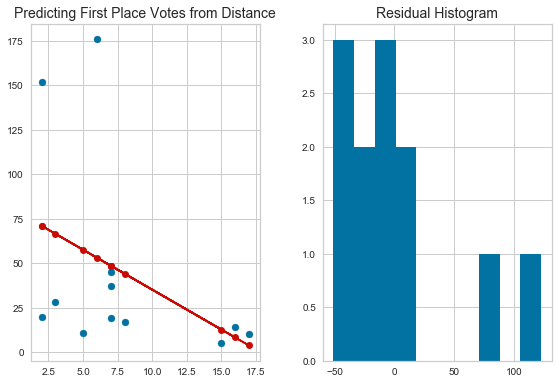

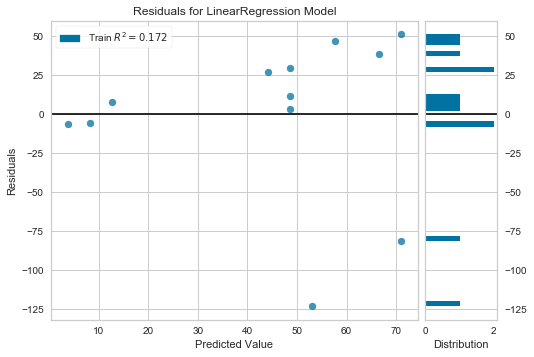

In [203]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(1, 2, tight_layout=True)
ax[0].scatter(dist_reshaped, first_place)
ax[0].plot(dist_reshaped, y_predict, '-o',color='r')
ax[0].set_title("Predicting First Place Votes from Distance", fontsize=14)
ax[1].hist(results.resid)
ax[1].set_title("Residual Histogram", fontsize=14)
plt.show()

visualizer = ResidualsPlot(reg)
visualizer.fit(dist_reshaped, first_place)
visualizer.show()

Now, let's investigate those outliers

In [204]:
rankings['dist'] = dist 
rankings

,1,2,3,4,5,6,7,8,9,10,11,12,dist
House,,,,,,,,,,,,,
Adams,20,15,24,38,37,44,67,75,74,28,32,80,2
Cabot,5,13,16,17,7,20,16,31,49,118,148,94,15
Kirkland,19,19,35,50,71,63,72,70,56,24,24,31,7
Mather,17,15,19,25,27,40,44,67,112,37,55,76,8
Quincy,28,43,55,90,71,82,65,44,21,17,14,4,3
Leverett,11,22,40,73,76,81,94,66,36,18,11,6,5
Dunster,45,67,113,56,70,42,44,52,19,10,11,5,7
Currier,14,10,16,15,18,19,20,23,43,92,114,150,16
Eliot,37,57,60,67,57,76,49,40,38,23,16,14,7


AHA! The outliers are Lowell and Winthrop! I suspect that the recent renovations are causing these two houses to have lots of first place votes despite their distances from Widener. If only there was some way to control for renovations...

## Multiple Regression

We can also run a regression model with more than one predictor variables. All you have to do is add the predictors to your design matrix X and use the lm.fit() command. This allows us to control for confounding variables.

Here, I've fitted a model to predict number of first-choice votes each house received, with two predictor variables. I've given you two possible variables below, though you're welcome to find more, or different ones. Again, note that you may need to reshape data.

*Hint: You still need to find the dependent variable, and structure it like the `levCounts` variable above.*

In [205]:
#walking time from Widener Library (in minutes), from Google Maps
dist = [2, 15, 7, 8, 3, 5, 7, 16, 7, 2, 17, 6]
#was the house renovated in last 10 years? 1 if true
renovated = [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1]

X = np.matrix([dist, renovated]).transpose()
Y = [rankings.values[i,0] for i in range(0, 12)]
Y = np.array([Y]).reshape(-1, 1)

reg = lm.fit(X, Y)
[reg.intercept_, reg.coef_]

[array([31.89518947]), array([[-1.40647675, 56.9746036 ]])]

Again, you can do this using an OLS Object as well with properly formatted data. 

In [206]:
X_ols = sm.add_constant(X)
mod = sm.OLS(Y,X_ols)
results = mod.fit()
results.summary()

/Users/sethbilliau/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  of the normal distribution: ``kurtosis = 3(n-1)/(n+1)``.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     2.464
Date:                Sun, 13 Oct 2019   Prob (F-statistic):              0.140
Time:                        23:11:59   Log-Likelihood:                -62.443
No. Observations:                  12   AIC:                             130.9
Df Residuals:                       9   BIC:                             132.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.8952     40.678      0.784      0.453     -60.125     123.916
x1            -1.4065      3.486     -0.403      0.696      -9.292       6.479
x2            56.9746     35.759      1.593      0.146     -23.918     137.867
==============================================================================
Omnibus:                        1.891   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                0.658
Skew:                           0.572   Prob(JB):                        0.720
Kurtosis:                       3.089   Cond. No.                         32.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now let's plot our prediction lines again.

[ 0.89549379  6.08904403 -0.14556638]


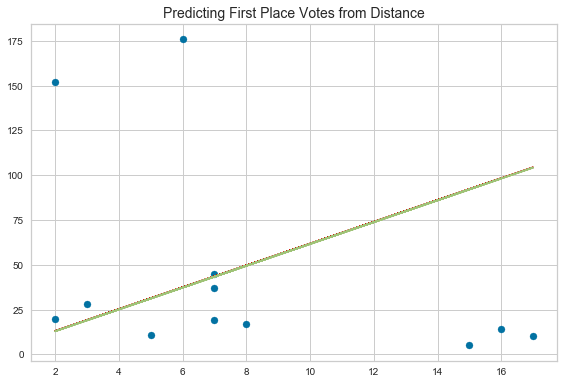

In [214]:
#X, Y is the order
coef = results.params
print(coef)
y_predict = np.multiply(dist_reshaped,beta1) + beta0

x = np.linspace(1,17,100)
y_0 = coef[1]*dist_reshaped+coef[0]
y_1 = (coef[1])*dist_reshaped + coef[0] + coef[2]

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.scatter(dist_reshaped, first_place)
ax.plot(dist_reshaped, y_0, '-',color='r')
ax.plot(dist_reshaped, y_1, '-',color='g')
ax.set_title("Predicting First Place Votes from Distance", fontsize=14)
plt.show()

Obviously, this helped a lot. 

## Interpreting your Coefficients
In multiple regression, we control for certain variables by introducing them as predictors. In this case, the coefficient -1.4065 is the change in first-place votes for a one unit change in distance from Widener library controlling for whether or not a house has been renovated. 

The coefficient 56.9746 is the change in first-place votes for a one unit change in the renovations indicator variable holding distance from Widener library constant. In other words, if a house is renovated, we can expect a 56.9746 increase in first-place votes, controlling for distance to Widener. 

Sometimes, we have coefficients whose interpretations don't really make that much sense or that aren't really useful. For example, the coefficient 31.8952 is the expected number of first place votes that a non-renovated house 0 minutes from Widener would receive. While this isn't hard to interpret, it's not that useful unless Harvard was thinking about bulldozing Widener to build a new house. 

### Prediction
Finally, one of the most useful things we can do with a predictive model is make predictions! Assuming you called your model `reg`, use the command below to predict the number of first choice votes for Adams House after the renovations begin.

In [207]:
reg.predict(np.array([[2, 1]]))

array([[86.05683956]])

## Your Turn
I've loaded in a dataset on Presidential elections by state courtesy of Stat 139. Try to predict gap16repub using multiple predictors. 

In [208]:
pres = pd.read_csv("pres_elections_bystate.csv")
pres.head()

import statsmodels.api as sm

## TODO ##
X = np.matrix([pres.gap12repub, pres.governor_repub, pres.hispanic13]).transpose()
Y = pres.gap16repub
Y = np.array([Y]).reshape(-1, 1)
X_ = sm.add_constant(X)

reg = lm.fit(X, Y)
[reg.intercept_, reg.coef_]

mod = sm.OLS(Y,X)
results = mod.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     151.5
Date:                Sun, 13 Oct 2019   Prob (F-statistic):           1.79e-24
Time:                        23:11:59   Log-Likelihood:                -174.17
No. Observations:                  51   AIC:                             354.3
Df Residuals:                      48   BIC:                             360.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8955      0.051     17.684      0.000       0.794       0.997
x2             6.0890      1.913      3.183      0.003       2.243       9.935
x3            -0.1456      0.096     -1.509      0.138      -0.340       0.048
==============================================================================
Omnibus:                       26.282   Durbin-Watson:                   1.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.269
Skew:                          -1.370   Prob(JB):                     4.07e-15
Kurtosis:                       7.867   Cond. No.                         42.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""